#                            Haberman’s Cancer Survival: Exploratory Data Analysis 

### 1. About The data - 

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:

Age - Age of patient at time of operation (numerical)

Year - Patient's year of operation (year - 1900, numerical)

Nodes - Number of positive axillary nodes detected (numerical)

Status - Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

A positive axillary lymph node is a lymph node in the area of the armpit (axilla) to which cancer has spread. This spread is determined by surgically removing some of the lymph nodes and examining them under a microscope to see whether cancer cells are present. 

Objective is to find Impact of the patient’s age, year of Operation and the number of positive axillary lymph nodes on patients survival after 5 years of operations. 

### 2. Importing important Python packages helpful for EDA

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 3. Basic Information about data 

In [57]:
Haberman = pd.read_csv("Haberman.csv")
print (Haberman.shape)
print (Haberman.columns)
Haberman["status"].value_counts()

(306, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')


1    225
2     81
Name: status, dtype: int64

##### Obesrvations - 
3.1 - Data set has 306 values and 4 attribuires ( age , year , nodes and status).                                                
3.2 - Out of 306 patient  - 225 has been survived after 5 years of operation

### 4.  Scattered Plots - 2D

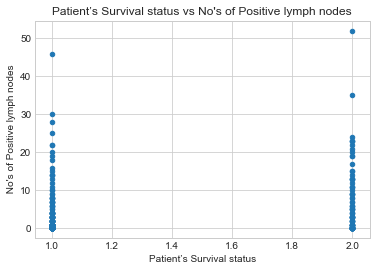

In [58]:
Haberman.plot(kind='scatter', x='status', y='nodes') ;
plt.title("Patient’s Survival status vs No's of Positive lymph nodes")
plt.xlabel("Patient’s Survival status")
plt.ylabel(" No's of Positive lymph nodes")

plt.show()

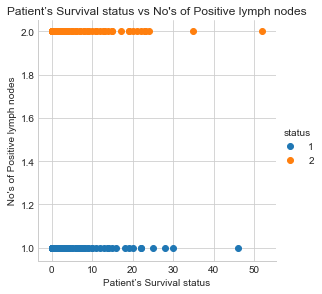

In [59]:
sns.set_style("whitegrid");
sns.FacetGrid(Haberman, hue="status", size=4) \
   .map(plt.scatter, "nodes", "status") \
   .add_legend();
plt.title("Patient’s Survival status vs No's of Positive lymph nodes")
plt.xlabel("Patient’s Survival status")
plt.ylabel(" No's of Positive lymph nodes")
plt.show();

###### Observations – 
2D scattered plot not telling much how nodes of positive axillary lymph node is impacting the survival of patience. 
The status is given in numbers (i.e. 1 and 2) , which is not intuitive enough while plotting the data regarding legend and analysis. 

Action – 
Crate a new CVS in Current working directory named HebarmanNew.csv , replace the 

1 – as survived and
2 – as Not survived and import it again.   


In [60]:
HabermanNew = pd.read_csv("HabermanNew.csv")
HabermanNew.status.unique()

array(['Survived', ' Not Survived'], dtype=object)

###### Observations – 
status has changed - 

1 – as survived and

2 – as Not survived  

### 5. Probability Distribution (Histogram) 

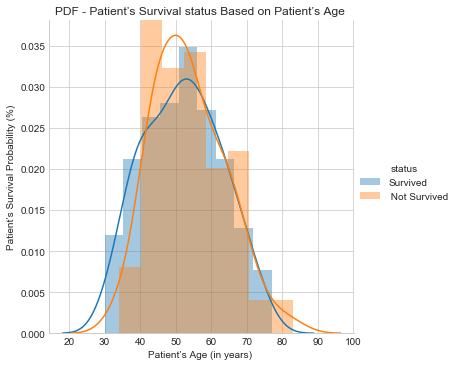

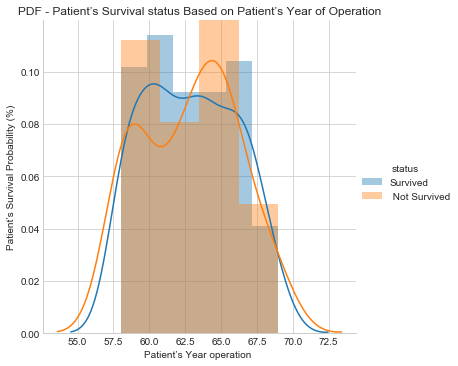

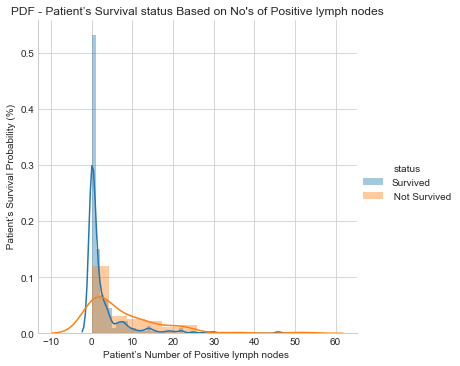

In [61]:
import warnings 
warnings.filterwarnings("ignore") 

sns.FacetGrid(HabermanNew, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("PDF - Patient’s Survival status Based on Patient’s Age ")
plt.xlabel("Patient’s Age (in years) ")
plt.ylabel("Patient’s Survival Probability (%)")
sns.FacetGrid(HabermanNew, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("PDF - Patient’s Survival status Based on Patient’s Year of Operation")
plt.xlabel("Patient’s Year operation ")
plt.ylabel("Patient’s Survival Probability (%)")
sns.FacetGrid(HabermanNew, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("PDF - Patient’s Survival status Based on No's of Positive lymph nodes")
plt.xlabel("Patient’s Number of Positive lymph nodes ")
plt.ylabel(" Patient’s Survival Probability (%)")
plt.show()


###### Observations – 
Probability distribution for “Age” and “Year of operation” against the patients survived after 5 years of operation / Not survived are superimposing each other , hence not intuitive enough to providing the important clue for prediction. 
Followings are the observation based on no’s of positive axillary lymph node
 
1.	Most patients survived after 5 years of operation have been observed having low numbers 0  to 5 no’s of positive axillary lymph node
2.	Most patients NOT survived after 5 years of operation have been observed having high numbers 5 to 30 no's of positive axillary lymph node


### 6. Cummulative Distribution Funtion(CDF) 

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


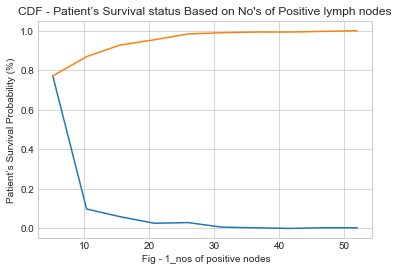

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


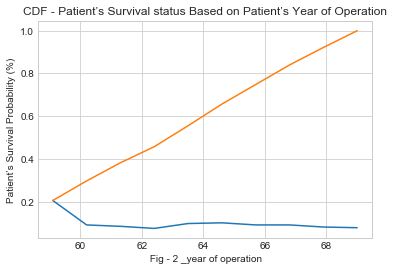

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


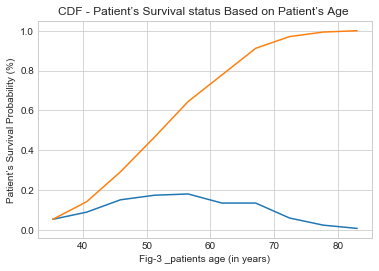

In [62]:
# nos of positive nodes
counts, bin_edges = np.histogram(HabermanNew['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel(' Fig - 1_nos of positive nodes')
plt.ylabel("Patient’s Survival Probability (%)")
plt.title("CDF - Patient’s Survival status Based on No's of Positive lymph nodes")


plt.show();

#year of operation

counts, bin_edges = np.histogram(HabermanNew['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel(' Fig - 2 _year of operation')
plt.ylabel("Patient’s Survival Probability (%)")
plt.title("CDF - Patient’s Survival status Based on Patient’s Year of Operation")

plt.show();

#patients age

counts, bin_edges = np.histogram(HabermanNew['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Fig-3 _patients age (in years)')
plt.title("CDF - Patient’s Survival status Based on Patient’s Age ")
plt.ylabel("Patient’s Survival Probability (%)")


plt.show();



###### Observations – 
1.	Number of positive axillary lymph nodes has direct relation of survival of patients after 5 years of operation. 

2.	Based on Positive axillary lymph node CDF (Fig-1) , the 80% of patients have survived after 5 years of operation have less than or equal to 5 positive axillary lymph node


### 7. Box Plot 

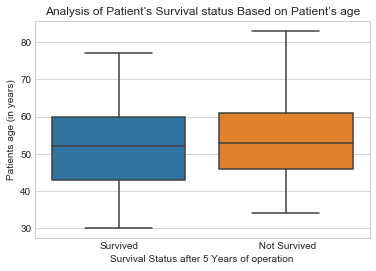

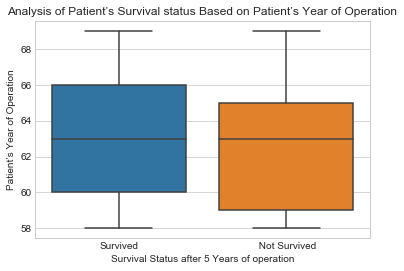

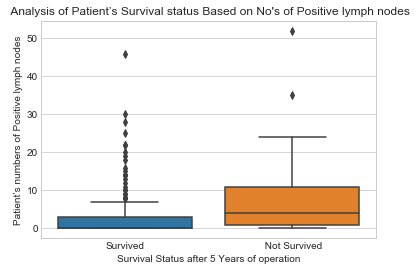

In [63]:
sns.boxplot(x='status',y='age', data=HabermanNew)
plt.xlabel('Survival Status after 5 Years of operation' )
plt.title("Analysis of Patient’s Survival status Based on Patient’s age")
plt.ylabel('Patients age (in years)')
plt.show()

sns.boxplot(x='status',y='year', data=HabermanNew)
plt.xlabel('Survival Status after 5 Years of operation')
plt.title("Analysis of Patient’s Survival status Based on Patient’s Year of Operation")
plt.ylabel('Patient’s Year of Operation')
plt.show()

sns.boxplot(x='status',y='nodes', data=HabermanNew)
plt.xlabel('Survival Status after 5 Years of operation')
plt.title(" Analysis of Patient’s Survival status Based on No's of Positive lymph nodes")
plt.ylabel('Patient’s numbers of Positive lymph nodes')


plt.show()

### 8. Violin Plot

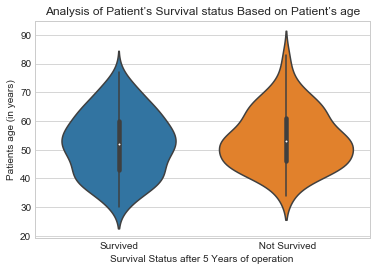

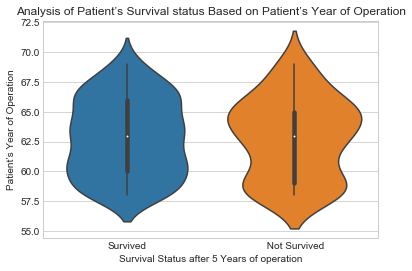

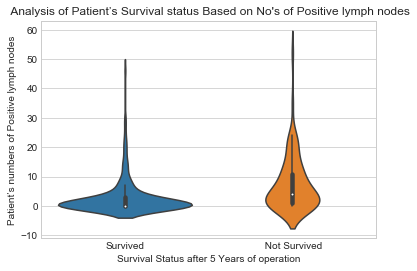

In [64]:
sns.violinplot(x='status',y='age', data=HabermanNew)
plt.xlabel('Survival Status after 5 Years of operation')
plt.title("Analysis of Patient’s Survival status Based on Patient’s age")
plt.ylabel('Patients age (in years)')
plt.show()

sns.violinplot(x='status',y='year', data=HabermanNew)
plt.xlabel('Survival Status after 5 Years of operation')
plt.title("Analysis of Patient’s Survival status Based on Patient’s Year of Operation")
plt.ylabel('Patient’s Year of Operation')
plt.show()


sns.violinplot(x='status',y='nodes', data=HabermanNew)
plt.xlabel('Survival Status after 5 Years of operation')
plt.title(" Analysis of Patient’s Survival status Based on No's of Positive lymph nodes")
plt.ylabel('Patient’s numbers of Positive lymph nodes')

plt.show()

### 9. Pair Plot

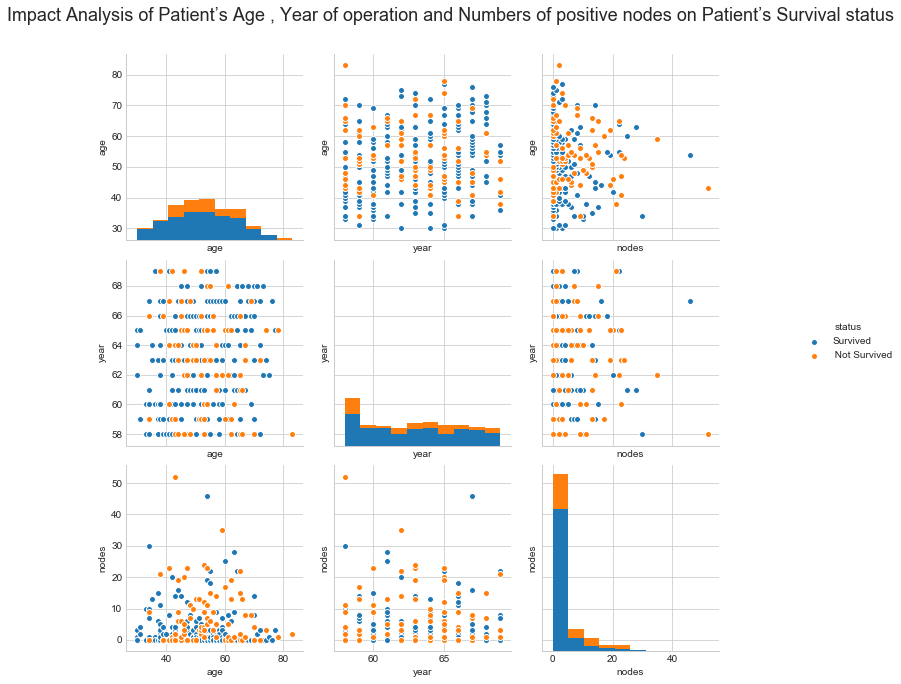

In [65]:
sns.set_style("whitegrid");
P= sns.pairplot(HabermanNew, hue="status", size=3);
P.fig.suptitle("Impact Analysis of Patient’s Age , Year of operation and Numbers of positive nodes on Patient’s Survival status", size = 18,y=1.05)
xlabels,ylabels = [],[]

for ax in P.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in P.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        P.axes[j,i].xaxis.set_label_text(xlabels[i])
        P.axes[j,i].yaxis.set_label_text(ylabels[j])
plt.show()

# age - Patient’s Age (in years)
# year -Patient’s Year of operation
# nodes -Patient’s number of positive axillary lymph nodes


###### Observations – 
Most patients survived after 5 years of operation have been observed having low numbers 0  to 5 no’s of positive axillary lymph node



### 10. Conclusion

Number of positive axillary lymph node has major impact on patient’s survival after 5 years of operation. The more the numbers of positive axillary lymph node the less the chances of patient’s survival after operation. 


### 11. References -
1.	Description  for positive axillary lymph node 
https://en.wikipedia.org/wiki/Positive_axillary_lymph_node

2.	More information on Haberman cancer survival data 
https://www.kaggle.com/gilsousa/habermans-survival-data-set

3.	Checking the unique values in column of data frame 
https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/

4. Pairplot X and Y label 
https://stackoverflow.com/questions/33377243/seaborn-pairgrid-show-axes-labels-for-each-subplot

5. Pair plot title and distance between title
https://stackoverflow.com/questions/16419670/increase-distance-between-title-and-plot-in-matplolib
